#1. Understanding the problem

we are going to build a model that tries to predict total coronavirus deaths in tunisia based on daily new cases , total  cases ,daily tests and the number of recovered  .the given data represents coronavirus cases in tunisia between 2march and 12 april 2020

# 2. Choosing an appropriate data

In [ ]:
import pandas as pd 
data=pd.read_csv("covid_data.txt",sep="\t",header=0)

In [ ]:
data

,DATE,TCCT,DNCT,TCDT,TNDT,DT,TCRT
0,02 March 2020,0,0,0,0,0,0
1,03 March 2020,0,0,0,0,0,0
2,04 march 2020,1,1,0,0,0,0
3,05 march 2020,1,0,0,0,0,0
4,06 march 2020,1,0,0,0,0,0
5,07 march 2020,1,0,0,0,0,0
6,08 march 2020,2,1,0,0,0,0
7,09 march 2020,5,3,0,0,0,0
8,10 march 2020,6,1,0,0,28,0
9,11 march 2020,7,1,0,0,71,0




  (coronavirus cases in tunisia between 2march and 12 april 2020)


*  TCCT :total coronavirus cases in tunisia 
-DNCT: daily new cases in tunisia
-TCDT :total coronavirus deaths in tunisia
-DT :daily tests
-TCRT: total coronavirus recovred in tunisia 
-TNDT : total new deaths in tunisia




In [ ]:

data.shape

(42, 7)

# 3. Preparing the data

In [ ]:

data.describe()

,TCCT,DNCT,TCDT,TNDT,DT,TCRT
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,245.190476,17.761905,8.595238,0.809524,286.380952,7.690476
std,264.014804,17.141889,10.571613,1.131330,271.829749,13.637266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.750000,2.250000,0.000000,0.000000,33.750000,0.000000
50%,101.500000,14.500000,3.000000,0.000000,136.500000,1.000000
75%,485.000000,29.500000,17.000000,1.000000,568.750000,5.000000
max,726.000000,59.000000,34.000000,4.000000,749.000000,43.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    42 non-null     object
 1   TCCT    42 non-null     int64 
 2   DNCT    42 non-null     int64 
 3   TCDT    42 non-null     int64 
 4   TNDT    42 non-null     int64 
 5   DT      42 non-null     int64 
 6    TCRT   42 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.4+ KB


In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'])
for date in data["DATE"]:
  print(date)

2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-07 00:00:00
2020-03-08 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00
2020-03-12 00:00:00
2020-03-13 00:00:00
2020-03-14 00:00:00
2020-03-15 00:00:00
2020-03-16 00:00:00
2020-03-17 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-20 00:00:00
2020-03-21 00:00:00
2020-03-22 00:00:00
2020-03-23 00:00:00
2020-03-24 00:00:00
2020-03-25 00:00:00
2020-03-26 00:00:00
2020-03-27 00:00:00
2020-03-28 00:00:00
2020-03-29 00:00:00
2020-03-30 00:00:00
2020-03-31 00:00:00
2020-04-01 00:00:00
2020-04-02 00:00:00
2020-04-03 00:00:00
2020-04-04 00:00:00
2020-04-05 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00




*   Date is an important feature to build our model we are going to split the date into days and mounths to feed our model some significant values instead of doing feature transformation 




In [ ]:
days=[]
for x in data["DATE"]:
  days.append(x.day)
months=[]
for x in data["DATE"]:
  months.append(x.month)
day=pd.DataFrame(days,columns=["DAY"])
mounth=pd.DataFrame(months,columns=["MOUNTH"])
data=data.drop(["DATE"],axis=1)
data=data.join(day)
data=data.join(mounth)

data

,TCCT,DNCT,TCDT,TNDT,DT,TCRT,DAY,MOUNTH
0,0,0,0,0,0,0,2,3
1,0,0,0,0,0,0,3,3
2,1,1,0,0,0,0,4,3
3,1,0,0,0,0,0,5,3
4,1,0,0,0,0,0,6,3
5,1,0,0,0,0,0,7,3
6,2,1,0,0,0,0,8,3
7,5,3,0,0,0,0,9,3
8,6,1,0,0,28,0,10,3
9,7,1,0,0,71,0,11,3


**Outliers**




*   since we are going to predict some numrical data we are going to use regression methodes which are sensitive to outliers that s why we have to eliminate them 





In [ ]:
from scipy import stats 
import numpy as np 
z=np.abs(stats.zscore(data))
data=data[(z<3).all(axis=1)]
data

,TCCT,DNCT,TCDT,TNDT,DT,TCRT,DAY,MOUNTH
0,0,0,0,0,0,0,2,3
1,0,0,0,0,0,0,3,3
2,1,1,0,0,0,0,4,3
3,1,0,0,0,0,0,5,3
4,1,0,0,0,0,0,6,3
5,1,0,0,0,0,0,7,3
6,2,1,0,0,0,0,8,3
7,5,3,0,0,0,0,9,3
8,6,1,0,0,28,0,10,3
9,7,1,0,0,71,0,11,3


# 4.Data Viz

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


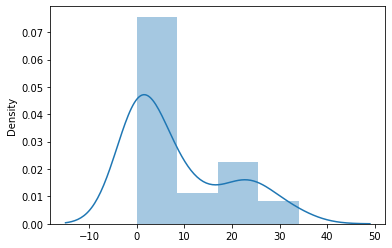

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(x=data["TCDT"])

*   mean of TCDT 8.5





In [ ]:
corr=data.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,TCCT,DNCT,TCDT,TNDT,DT,TCRT,DAY,MOUNTH
TCCT,1.00,0.57,0.98,0.65,0.93,0.83,-0.12,0.89
DNCT,0.57,1.00,0.46,0.50,0.73,0.19,0.36,0.34
TCDT,0.98,0.46,1.00,0.66,0.87,0.89,-0.21,0.92
TNDT,0.65,0.50,0.66,1.00,0.66,0.44,-0.03,0.58
DT,0.93,0.73,0.87,0.66,1.00,0.62,0.01,0.78
TCRT,0.83,0.19,0.89,0.44,0.62,1.00,-0.21,0.78
DAY,-0.12,0.36,-0.21,-0.03,0.01,-0.21,1.00,-0.51
MOUNTH,0.89,0.34,0.92,0.58,0.78,0.78,-0.51,1.00




*   when using linear regression  we have to keep variables that are in strong correlation with total death as it shows the heatmap all the features are strongly correlated with total death especially TCCT (0.98) 



Text(0, 0.5, 'DT')

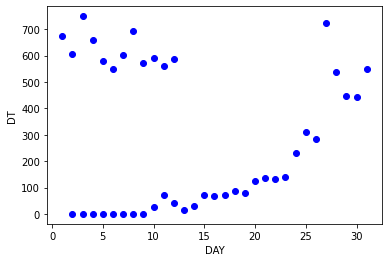

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data["DAY"],data["DT"],"bo")  
plt.xlabel("DAY")
plt.ylabel("DT")




*  during the first periode (between 2nd and 7th march 2020) there was no DT made . after the 7th we can t get any insights from the variation of the number of daily tests it doent grow with days nor with TCCT maybe it depends on  each  new case  



Text(0, 0.5, 'DAY')

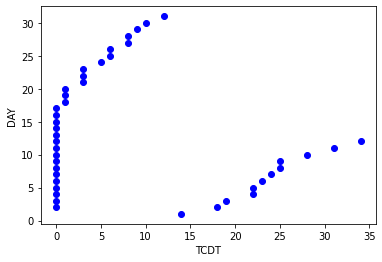

In [ ]:
plt.plot(data["TCDT"],data["DAY"],"bo")  
plt.xlabel("TCDT")
plt.ylabel("DAY")




*   we have positive correlation between TCDT and DAY betwwen day 0 and 15 the number of TCDT is stable 0(no death) after day 15 the number of deaths grows each day 


Text(0, 0.5, 'TCCT')

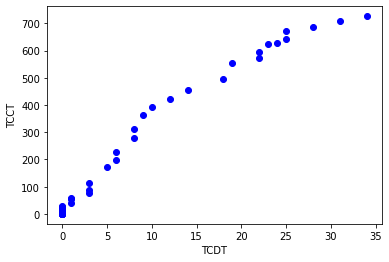

In [ ]:
plt.plot(data["TCDT"],data["TCCT"],"bo")  
plt.xlabel("TCDT")
plt.ylabel("TCCT")



*   there is a strong positive correlation between TCDT and TCCT 



# 5.Choosing the right algorithm : LinearRegression 

**Simple LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
x=data[["TCCT"]]
y=data[["TCDT"]]
model=LinearRegression()
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
tab =cross_val_score(model, x, y, cv=cv,scoring="r2")
print("cross validation score",tab)
print("r**2 mean score",tab.mean())

cross validation score [0.92226715 0.93091332 0.97900458]
r**2 mean score 0.9440616815054073


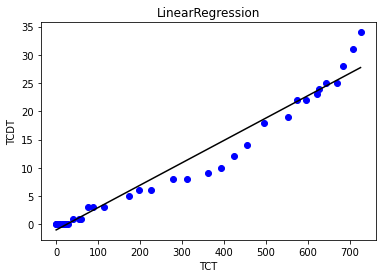

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
model.fit(x_train,y_train)

plt.scatter(x,y,color="b")
plt.xlabel("TCT")
plt.ylabel("TCDT")
plt.title("LinearRegression")
plt.plot(x,model.predict(x),"k")

**MultiLinear Regression**

In [ ]:
from sklearn.model_selection import cross_val_score
x=data[["TCCT","DT","DNCT"," TCRT","TNDT","DAY","MOUNTH"]]
y=data[["TCDT"]]
model=LinearRegression() 
tab =cross_val_score(model, x, y, cv=cv,scoring="r2")
print("cross validation score",tab)
print("r**2 mean score",tab.mean())


cross validation score [0.95969    0.97753697 0.9879042 ]
r**2 mean score 0.9750437215215326


# 5.Choosing the right algorithm : PolynomialRegression




**simple polyregression** 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x=data[["TCCT"]]
y=data[["TCDT"]]
model=LinearRegression() 
poly=PolynomialFeatures(degree=2) 
x=poly.fit_transform(x)
tab =cross_val_score(model, x, y, cv=cv,scoring="r2")

print("cross validation score",tab)
print("r**2  meann score",tab.mean())

cross validation score [0.98753784 0.98254146 0.99513989]
r**2  meann score 0.9884063967931218


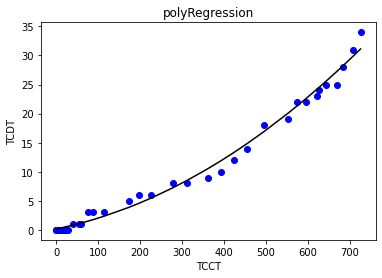

In [ ]:
x=data[["TCCT"]]
y=data[["TCDT"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x_train=poly.fit_transform(x_train)
model.fit(x_train,y_train)
x_test=poly.fit_transform(x_test)

predicted=model.predict(x_test)
plt.scatter(x,y,color="b")
plt.xlabel("TCCT")
plt.ylabel("TCDT")
plt.title("polyRegression")

plt.plot(x,model.predict(poly.fit_transform(x)),"k")

**multi polynomial regression**

In [ ]:
x=data[["TCCT","DT","DNCT"," TCRT","TNDT","DAY","MOUNTH"]]
y=data[["TCDT"]]
model=LinearRegression() 
poly=PolynomialFeatures(degree=2) 
x=poly.fit_transform(x)
tab =cross_val_score(model, x,y, cv=cv,scoring="r2")
print("cross validation score",tab)
print("r**2 mean  score",tab.mean())

cross validation score [  -4.60044533 -336.78897337  -31.29496352]
r**2 mean  score -124.22812740728358


# 5.Choosing the right algorithm : Random Forest regressor

**choosing the right parameters**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
model = RandomForestRegressor(max_depth=4)
model.fit(x_train,y_train)

parameters = { "max_depth": [3, 4,5, 7, 9, 11, 13]}
model_gr= GridSearchCV(model,parameters,cv=5, scoring="r2")
model_gr.fit(x_train,y_train)
print('Best parameters', model_gr.best_params_)
print("accuracy score of the best_estimator",model_gr.best_score_)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Best parameters {'max_depth': 7}
accuracy score of the best_estimator 0.9654838794000652


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)





*   We build a model with max_depth=7 as it has the highest accuracy 0.95 



# 6.Modeling



*   simple polynomial regression has the height accuracy (0.98) then multilinear regression with (0.97) we are going to choose multilinear regression as a final model because it takes more features into consideration and the gap between the two models isn t big 



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x=data[["TCCT","DT","DNCT"," TCRT","TNDT","DAY","MOUNTH"]]
y=data[["TCDT"]]
final_model=LinearRegression() 
x_train, x_vt, y_train, y_vt = train_test_split(x, y, test_size=0.4, random_state=0)
x_validation, x_test, y_validation, y_test = train_test_split(x_vt, y_vt, test_size=0.5, random_state=0)
final_model.fit(x_train,y_train)
predicted=final_model.predict(x_test)
print("r**2",r2_score(y_test,predicted))
predictedd=final_model.predict(x_validation)
print("r**2",r2_score(y_validation,predictedd))




r**2 0.9706324223700307
r**2 0.9830988581097293




*  accuracy on test dataset (0.97)
*   accuracy on validation dataset (0.98) 

-> the model didnt overfit  



# 7.Experimentation

In [ ]:

exp={"DAY":["21"],"MOUNTH":["10"],	"TCCT":[45832],	"DNCT":[1442]	,"TNDT":[29],	"DT":[311]	," TCRT":[5200]}

In [ ]:
experiment= pd.DataFrame.from_dict(exp)

In [ ]:
experiment

,DAY,MOUNTH,TCCT,DNCT,TNDT,DT,TCRT
0,21,10,45832,1442,29,311,5200


In [ ]:

y_predictt=final_model.predict(experiment)
y_predictt


array([[3096.79755555]])



*   right answer 740
